In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
k = 10 # Cycles
b = 0.2 # Trend
C = 3 # Const
s = 4 # Seasons
w = 0.7 # s weight
NN = 10
pred_length = 10
x = np.linspace(0, k * 2 * np.pi, k * NN)
x1 = x.copy()
for i in range(pred_length):
    x1 = np.append(x1, x1[-1] + x[1] - x[0])
print(len(x), len(x1))
y = C + b * x + np.sin(x) + w * np.cos(x / k * s) + np.random.normal(loc = 0, scale = 0.3, size = (k * NN,))

100 110


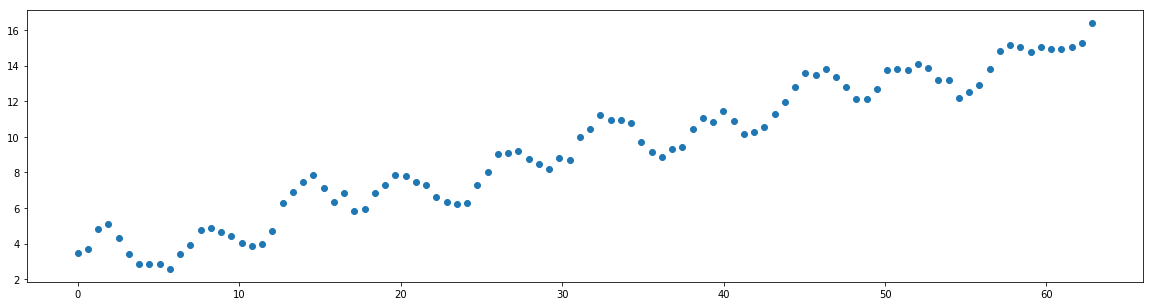

In [241]:
plt.figure(figsize = (20, 5))
plt.scatter(x, y)
plt.show()

/usr/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


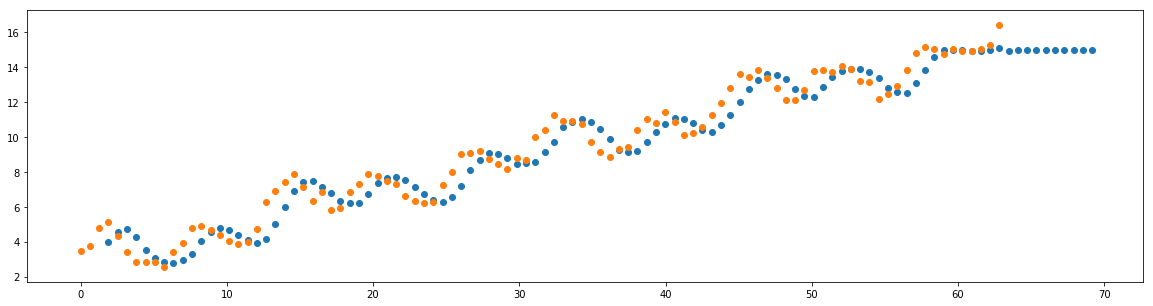

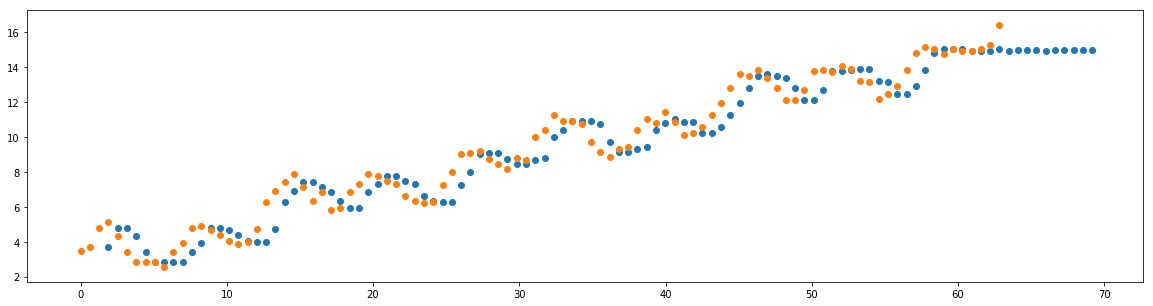

In [242]:
def lin_smooth(y, window):
    y1 = y.copy()
    for i in range(len(y)):
        y1[i] = np.mean(y[i - window : i])
    return y1

def med_smooth(y, window):
    y1 = y.copy()
    for i in range(len(y)):
        y1[i] = np.median(y[i - window : i])
    return y1

def mean_pred(x, y, window):
    y = y.copy()
    for i in range(len(y), len(x)):
        y = np.append(y, np.mean(y[i - 1 - window : i - 1]))
    return y

def median_pred(x, y, window):
    y = y.copy()
    for i in range(len(y), len(x)):
        y = np.append(y, np.median(y[i - 1 - window : i - 1]))
    return y

y1 = lin_smooth(y, 3)
y1 = mean_pred(x1, y1, 3)
y2 = med_smooth(y, 3)
y2 = mean_pred(x1, y2, 3)
plt.figure(figsize = (20, 5))
plt.scatter(x1, y1)
plt.scatter(x, y)
plt.show()
plt.figure(figsize = (20, 5))
plt.scatter(x1, y2)
plt.scatter(x, y)
plt.show()

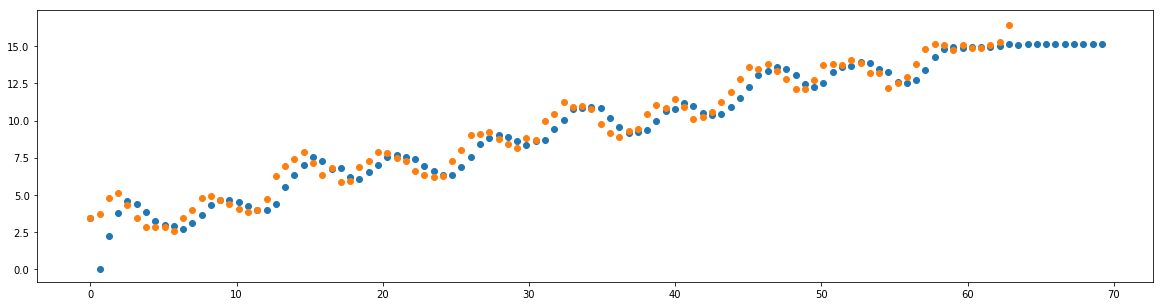

In [243]:
def exp_smooth_1(y, k):
    y1 = y.copy()
    for i in range(1, len(y)):
        tmp = 0
        arr = y[i - 1:0:-1]
        for j in range(len(arr)):
            tmp += arr[j] * (1 - k)**j
        y1[i] = k * tmp + y[0] * (1 - k)**(len(y) - 1)
    return(y1)

def exp1_pred(x, y, k):
    y = y.copy()
    for i in range(len(y), len(x)):
        y = np.append(y, y[-1] * k + y[-2] * (1 - k))
    return y

y1 = exp_smooth_1(y, 0.6)
y1 = exp1_pred(x1, y1, 0.6)
plt.figure(figsize = (20, 5))
plt.scatter(x1, y1)
plt.scatter(x, y)
plt.show()

In [ ]:
def exp_smooth_1(y, k):
    y1 = y.copy()
    for i in range(1, len(y)):
        tmp = 0
        arr = y[i - 1:0:-1]
        for j in range(len(arr)):
            tmp += arr[j] * (1 - k)**j
        y1[i] = k * tmp + y[0] * (1 - k)**(len(y) - 1)
    return(y1)

def exp1_pred(x, y, k):
    y = y.copy()
    for i in range(len(y), len(x)):
        y = np.append(y, y[-1] * k + y[-2] * (1 - k))
    return y

y1 = exp_smooth_1(y, 0.6)
y1 = exp1_pred(x1, y1, 0.6)
plt.figure(figsize = (20, 5))
plt.scatter(x1, y1)
plt.scatter(x, y)
plt.show()

In [229]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as stp 

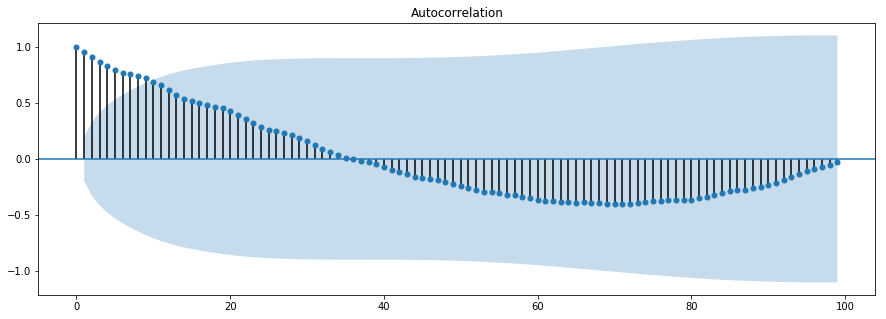

In [230]:
corr = sts.acf(y)
fig = stp.plot_acf(y)
fig.set_size_inches(15, 5)

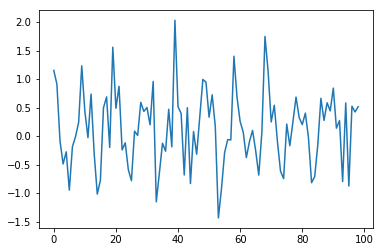

In [231]:
plt.plot(np.diff(y))

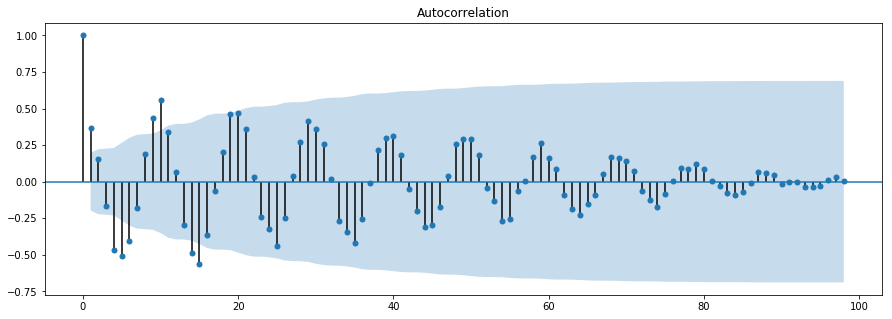

In [245]:
fig = stp.plot_acf(np.diff(y))
fig.set_size_inches(15, 5)

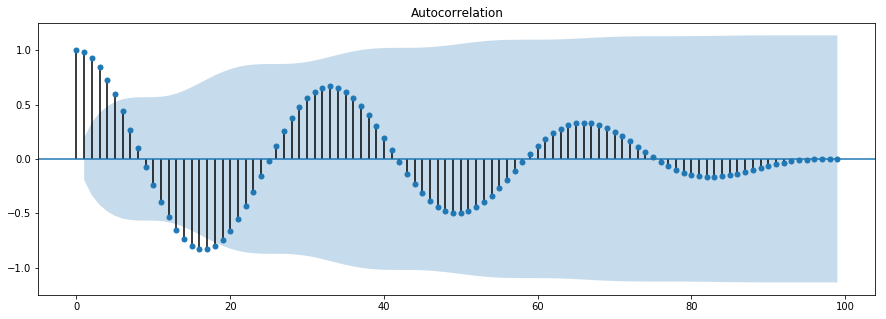

In [233]:
fig = stp.plot_acf([np.sin(x) for x in np.linspace(0, 6*np.pi, 100)])
fig.set_size_inches(15, 5)

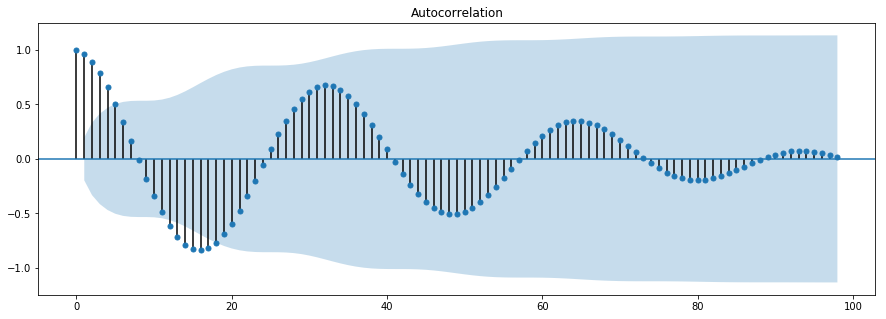

In [235]:
fig = stp.plot_acf(np.diff([np.sin(x) for x in np.linspace(0, 6*np.pi, 100)]))
fig.set_size_inches(15, 5)

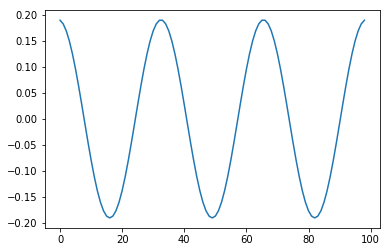

In [234]:
plt.plot(np.diff([np.sin(x) for x in np.linspace(0, 6*np.pi, 100)]))